## EPL(2020-21) Data Analysis

## OVERVIEW

#### 1. Data Cleaning & Filtering

#### 2. Augmenting Dataset

#### 3. PIE CHART - Penalties Scored vs Penalties Missed

#### 4. Finding Countries from which most players came from

#### 5. Clubs with Max & Least Players in their Squad

#### 6. PIE CHART - Diff Age Group

#### 7. BAR GRAPH - Under 20 Players in each Club

#### 8. BOX PLOT - Average Age of players in each club

#### 9. BAR GRAPH - Total Number of Assists From each Club

#### 10.Top 10 Assists by players

#### 11. BAR GRAPH - No. of Goals vs Clubs

#### 12. PIE CHART - Goals with Assists & Without Assists

#### 13. BAR GRAPH - Players with Most Yellow Cards

##### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# %matplotlib magic command --
#This performs the necessary behind-the-scenes setup for IPython to work correctly hand in hand with matplotlib

# %matplotlib inline --
#With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, 
#directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

##### Load Dataset

In [2]:
epl_df = pd.read_csv(r'C:\Users\acer\EPL_20_21.csv')
epl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [3]:
epl_df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


##### Checking for null values

In [4]:
epl_df.isna().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

### Augment Data with Additional Columns

##### Adding Minutes Per Match Column

In [5]:
epl_df['MinsPerMatch'] = (epl_df['Mins'] / epl_df['Matches']).astype(int)

##### Adding Goles Per Match Column

In [6]:
epl_df['GoalsPerMatch'] = (epl_df['Goals'] / epl_df['Matches']).astype(float)
epl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74,0.031250


##### Total Goals

In [7]:
Total_Goals = epl_df['Goals'].sum()
print(Total_Goals)

986


##### Total Penalty Goals

In [8]:
Total_Penalty = epl_df['Penalty_Goals'].sum()
print(Total_Penalty)

102


##### Total Penalty  Attempts

In [9]:
Total_PA = epl_df['Penalty_Attempted'].sum()
print(Total_PA)

125


##### Pie Chart for Penalties missed vs scored 

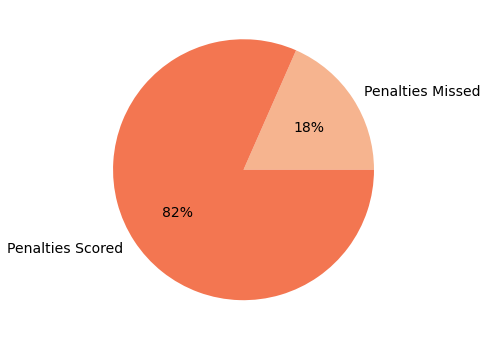

In [10]:
# Setting Figure Size
plt.figure(figsize = (13,6))
Penalty_NotScored = Total_PA - Total_Penalty

data = [Penalty_NotScored, Total_Penalty]
labels = ['Penalties Missed', 'Penalties Scored']
color = sns.color_palette("rocket_r")
plt.pie(data, labels = labels, colors=color, autopct = '%.0f%%', textprops={'fontsize': 14})

plt.show()





##### Unique Positions ||  Players

In [11]:
epl_df['Position'].unique()


array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

##### Total Forward Players

In [12]:
epl_df[epl_df['Position'] == 'FW']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
16,Tammy Abraham,Chelsea,ENG,FW,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0,47,0.272727
19,Olivier Giroud,Chelsea,FRA,FW,33,17,8,748,4,0,217,74.2,0,0,0.58,0.09,1,0,44,0.235294
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0,60,0.000000
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0,81,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Oliver Burke,Sheffield United,SCO,FW,23,25,14,1269,1,1,262,70.6,0,0,0.17,0.13,2,0,50,0.040000
518,Oliver McBurnie,Sheffield United,SCO,FW,24,23,12,1324,1,0,426,62.9,0,0,0.21,0.07,2,0,57,0.043478
519,Rhian Brewster,Sheffield United,ENG,FW,20,27,12,1128,0,0,225,69.3,0,0,0.14,0.13,1,0,41,0.000000
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0,45,0.187500


##### Players From Different Nations

In [13]:
np.size((epl_df['Nationality'].unique()))

59

##### Checking - Most Players From Which Countries

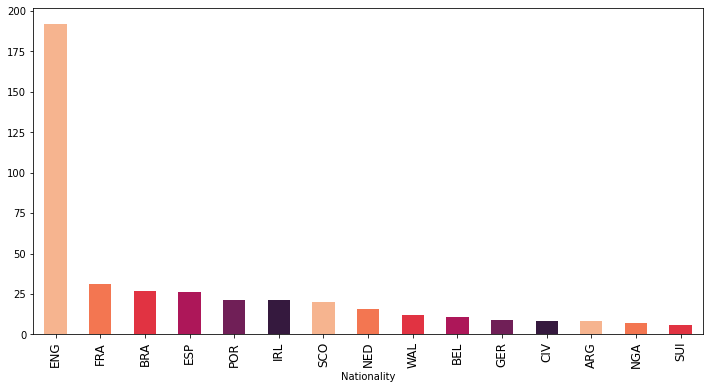

In [14]:
nationality = epl_df.groupby('Nationality').size().sort_values(ascending = False)
nationality.head(15).plot(kind = 'bar', figsize=(12,6), color= sns.color_palette("rocket_r"))

plt.xticks(size=12)
plt.show()



##### Top 5 Clubs with Max no. of Player in their squad

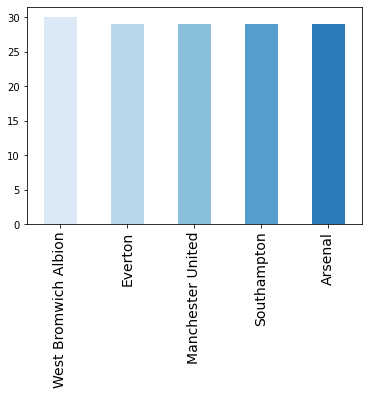

In [15]:
plt.figure(figsize = (6,4))
epl_df['Club'].value_counts().nlargest(5).plot(kind = 'bar', color=sns.color_palette("Blues"))
plt.xticks(size=14)
plt.show()

##### Top 10 Clubs with least player in their squad

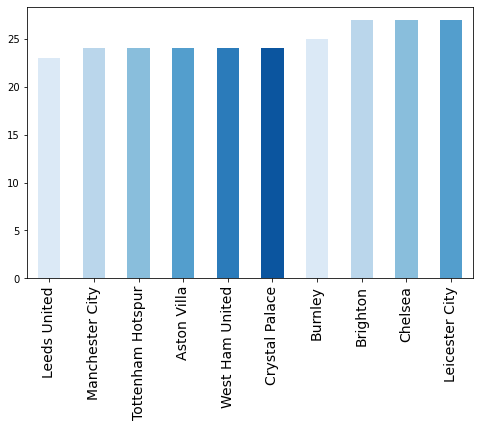

In [16]:
plt.figure(figsize = (8,5))
epl_df['Club'].value_counts().nsmallest(10).plot(kind = 'bar', color=sns.color_palette("Blues"))
plt.xticks(size=14)
plt.show()

##### Player Based on Age Group

In [17]:
under20 = epl_df[epl_df['Age'] <= 20]
age20_25 = epl_df[(epl_df['Age'] > 20) & (epl_df['Age'] <= 25)]
age25_30 = epl_df[(epl_df['Age'] > 25) & (epl_df['Age'] <= 30)]
above30 = epl_df[epl_df['Age'] > 30]

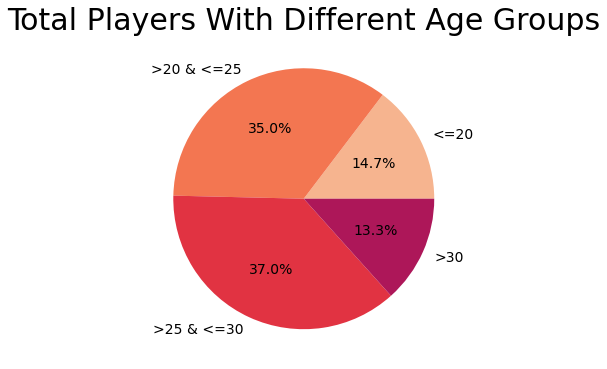

In [18]:
# Creating Pie Chart

plt.figure(figsize = (13,6))

x = np.array([under20['Name'].count(), age20_25['Name'].count(), age25_30['Name'].count(), above30['Name'].count()])
mylabels = ["<=20", ">20 & <=25", ">25 & <=30", ">30"]
plt.title('Total Players With Different Age Groups', fontsize = 30)
color2 = sns.color_palette("rocket_r")
plt.pie(x, labels = mylabels, colors = color2, autopct = "%.1f%%" , textprops={'fontsize': 14})
plt.show()




##### Total under 20 players in each club

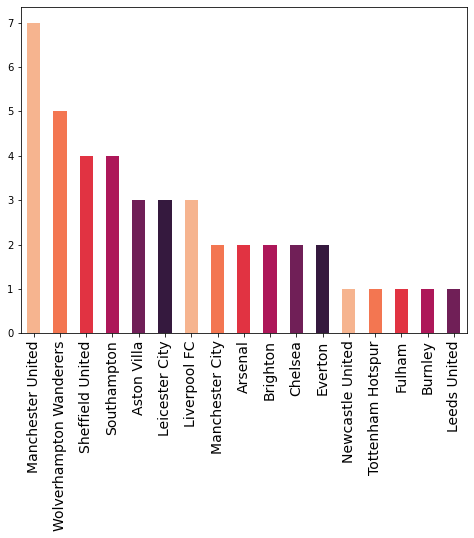

In [19]:
player_20 = epl_df[epl_df['Age'] < 20]
plt.figure(figsize = (8,6))
player_20['Club'].value_counts().plot(kind = 'bar', color = sns.color_palette("rocket_r"))
plt.xticks(size=14)
plt.show()

##### Under 20 Players in 'Manchester United'

In [20]:
player_20[player_20["Club"] == 'Manchester United']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
61,Mason Greenwood,Manchester United,ENG,FW,18,31,21,1822,7,2,732,83.1,0,0,0.37,0.09,2,0,58,0.225806
72,Brandon Williams,Manchester United,ENG,DF,19,4,2,188,0,0,140,85.7,0,0,0.05,0.01,0,0,47,0.000000
73,Amad Diallo,Manchester United,CIV,FW,18,3,2,166,0,1,64,84.4,0,0,0.02,0.26,0,0,55,0.000000
74,Anthony Elanga,Manchester United,SWE,FW,18,2,2,155,1,0,53,81.1,0,0,0.16,0.02,0,0,77,0.500000
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,8,75.0,0,0,0.00,0.00,0,0,5,0.000000
78,Hannibal Mejbri,Manchester United,FRA,MF,17,1,0,9,0,0,3,100.0,0,0,0.00,0.00,0,0,9,0.000000
79,William Thomas Fish,Manchester United,ENG,DF,17,1,0,1,0,0,1,0.0,0,0,0.00,0.00,0,0,1,0.000000


##### Under 20 Players in 'Chelsea'

In [21]:
player_20[player_20["Club"] == 'Chelsea']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
18,Callum Hudson-Odoi,Chelsea,ENG,"FW,DF",19,23,10,1059,2,3,659,82.2,0,0,0.12,0.26,0,0,46,0.086957
21,Billy Gilmour,Chelsea,SCO,MF,19,5,3,261,0,0,215,89.3,0,0,0.01,0.04,0,0,52,0.000000


##### Finding Average Age of Players in Each Club

In [22]:
num_player = epl_df.groupby('Club').size()
data = (epl_df.groupby('Club')['Age'].sum()) / num_player
data.sort_values(ascending = False)

Club
Crystal Palace             28.333333
West Ham United            27.500000
Burnley                    27.040000
West Bromwich Albion       26.766667
Newcastle United           26.074074
Manchester City            25.708333
Tottenham Hotspur          25.625000
Leicester City             25.592593
Chelsea                    25.592593
Liverpool FC               25.571429
Everton                    25.413793
Leeds United               25.347826
Fulham                     25.035714
Arsenal                    24.965517
Sheffield United           24.814815
Brighton                   24.555556
Wolverhampton Wanderers    24.444444
Aston Villa                24.291667
Southampton                24.137931
Manchester United          23.862069
dtype: float64

##### Plotting Box Plot to show average age of players in each club

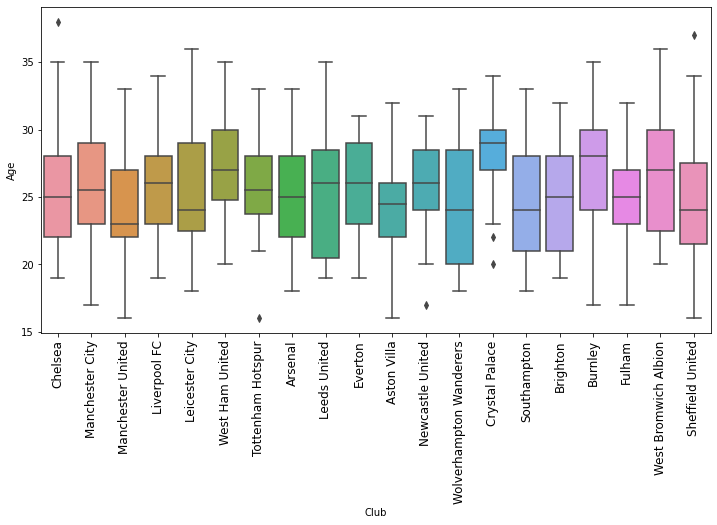

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'Club', y='Age', data = epl_df)
plt.xticks(rotation = 'vertical')
plt.xticks(size=12)
plt.show()

##### Total Number of Assists from each Club & Plotting Bar graph

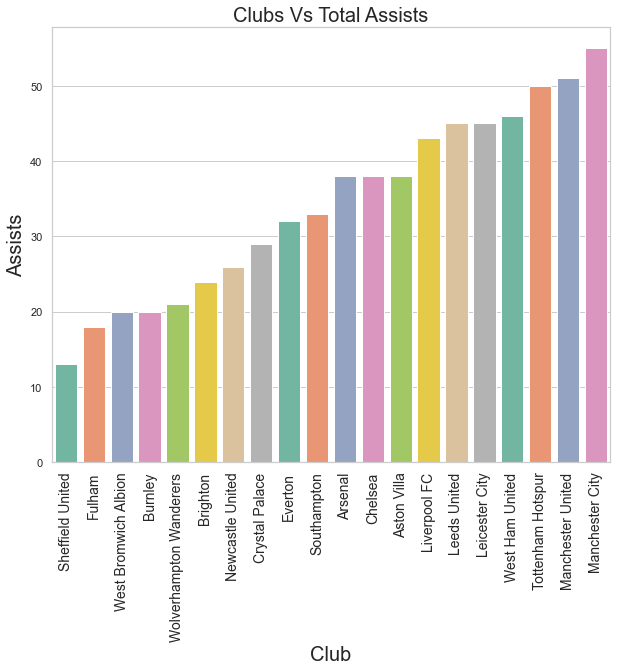

---------------Manchester City had the Highest Number of Assists----------------


In [25]:
assist_club = pd.DataFrame(epl_df.groupby('Club', as_index=False)['Assists'].sum())
sns.set_theme(style="whitegrid", color_codes=True)
ax = sns.barplot(x = 'Club', y = 'Assists', data=assist_club.sort_values(by="Assists"),palette='Set2')
ax.set_xlabel("Club", fontsize=20)
ax.set_ylabel("Assists", fontsize=20)
plt.xticks(rotation='vertical')
plt.xticks(size=14)
plt.rcParams["figure.figsize"] = (15,8)
plt.title('Clubs Vs Total Assists', fontsize = 20)
plt.show()

# Adding Conclusion to the Graph Using Python Print Statement(Making Bold and adding colors)
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
print(color.GREEN + "---------------Manchester City had the Highest Number of Assists----------------" + color.END)


##### Top 10 Assists

In [26]:
top_10_assists = epl_df[['Name', 'Club', 'Assists', 'Matches']].nlargest(n=10, columns = 'Assists')
top_10_assists

,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36


##### Total Goals From Each Club

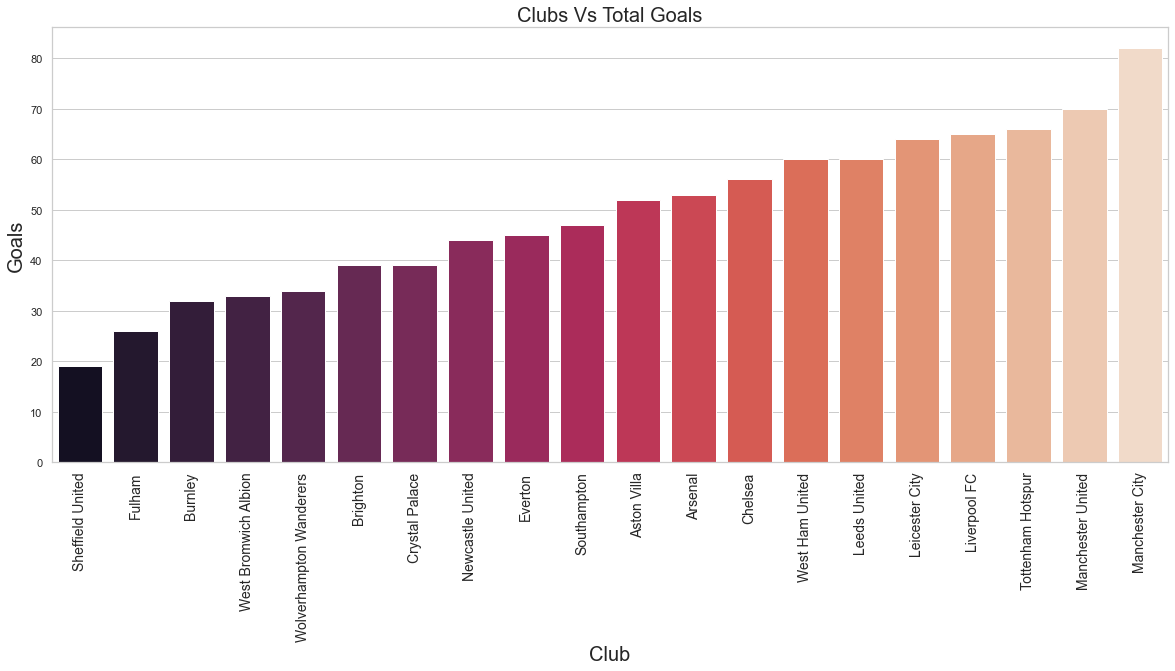

In [32]:
Goals_by_clubs = pd.DataFrame(epl_df.groupby('Club', as_index=False)['Goals'].sum())
sns.set_theme(style = "whitegrid", color_codes = True)
ax = sns.barplot(x = 'Club', y = 'Goals', data = Goals_by_clubs.sort_values(by = "Goals"), palette = 'rocket')
ax.set_xlabel("Club", fontsize = 20)
ax.set_ylabel("Goals", fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.xticks(size=14)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Clubs Vs Total Goals', fontsize = 20)
plt.show()

##### Most Goals By Players

In [33]:
top_10_goals = epl_df[['Name', 'Club', 'Goals', 'Matches']].nlargest(n=10, columns = 'Goals')
top_10_goals

,Name,Club,Goals,Matches
162,Harry Kane,Tottenham Hotspur,23,35
81,Mohamed Salah,Liverpool FC,22,37
51,Bruno Fernandes,Manchester United,18,37
161,Son Heung-min,Tottenham Hotspur,17,37
214,Patrick Bamford,Leeds United,17,38
237,Dominic Calvert-Lewin,Everton,16,33
110,Jamie Vardy,Leicester City,15,34
267,Ollie Watkins,Aston Villa,14,37
33,İlkay Gündoğan,Manchester City,13,28
191,Alexandre Lacazette,Arsenal,13,31


#####  Finding top 10 Player who scored most goals per match

In [34]:
goals_per_match = epl_df[['Name', 'GoalsPerMatch', 'Goals', 'Matches']].nlargest(n=10, columns = 'GoalsPerMatch')
goals_per_match

,Name,GoalsPerMatch,Goals,Matches
162,Harry Kane,0.657143,23,35
81,Mohamed Salah,0.594595,22,37
307,Joe Willock,0.571429,8,14
145,Jesse Lingard,0.562500,9,16
175,Gareth Bale,0.550000,11,20
74,Anthony Elanga,0.500000,1,2
51,Bruno Fernandes,0.486486,18,37
237,Dominic Calvert-Lewin,0.484848,16,33
120,Kelechi Iheanacho,0.480000,12,25
92,Diogo Jota,0.473684,9,19


##### Creating Pie Chart - Goals With Assists & Without Assists

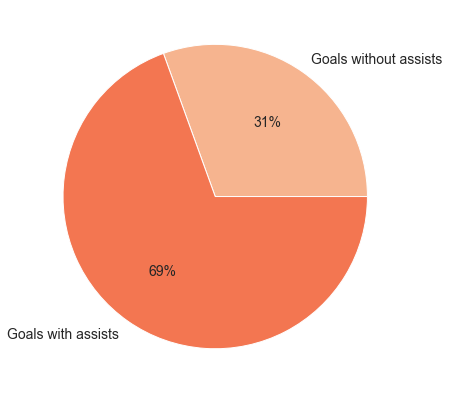

In [38]:
plt.figure(figsize = (14,7))
assists = epl_df['Assists'].sum()
data = [Total_Goals - assists, assists]
labels = ['Goals without assists', 'Goals with assists']
color = sns.color_palette('rocket_r')

plt.pie(data, labels = labels, colors = color, autopct = '%.0f%%', textprops={'fontsize': 14})
plt.show()

##### Top 10 Players with most Yellow Cards

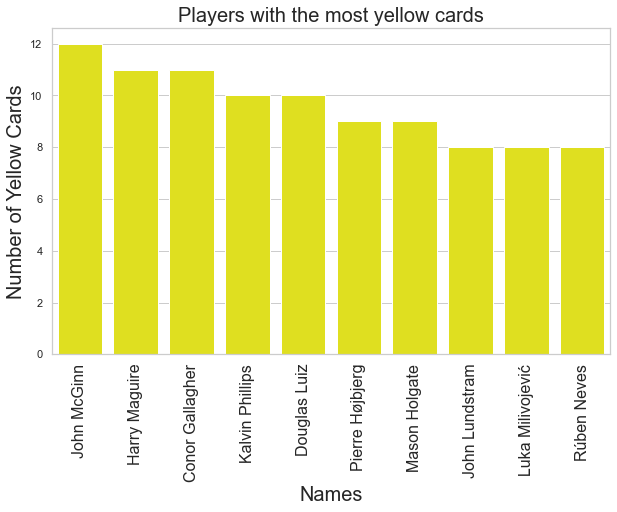

In [51]:
yellow_card = epl_df.sort_values(by = 'Yellow_Cards', ascending = False)[:10]
plt.figure(figsize = (10,6))
plt.title("Players with the most yellow cards", fontsize = 20)
ap1 = sns.barplot(x=yellow_card['Name'], y=yellow_card['Yellow_Cards'], label='Players', color = 'yellow')
plt.ylabel('Number of Yellow Cards', fontsize = 20)
plt.xlabel('Names', fontsize = 20)
ap1.set_xticklabels(ap1.get_xticklabels(), rotation = 'vertical')
plt.xticks(size=16)
plt.show()